In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [6]:
from pandas.io.data import DataReader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
# Get technology stock data from Yahoo for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [12]:
#Set up date to get data from one year ago to present
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [13]:
#Extract data and build dataframe for each stock. Using "globals" will set string name (stock) to be name of the dataframe

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [14]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-23,128.300003,130.419998,128.139999,129.669998,45770900,127.310014
2015-04-24,130.490005,130.630005,129.229996,130.279999,44525900,127.908913
2015-04-27,132.309998,133.130005,131.149994,132.649994,96954200,130.235775
2015-04-28,134.460007,134.539993,129.570007,130.559998,118924000,128.183816
2015-04-29,130.160004,131.589996,128.300003,128.639999,63386100,126.298762


In [15]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,113.947510,115.028775,112.726838,113.878142,4.851384e+07,112.923097
std,10.860726,10.706048,10.923176,10.763128,2.103285e+07,10.174986
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,106.959999,107.720001,105.519997,106.129997,3.403930e+07,106.129997
50%,113.629997,114.720001,112.269997,113.690002,4.452590e+07,112.663779
75%,123.379997,124.059998,122.269997,123.279999,5.555040e+07,121.541881
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-04-23 to 2016-04-22
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


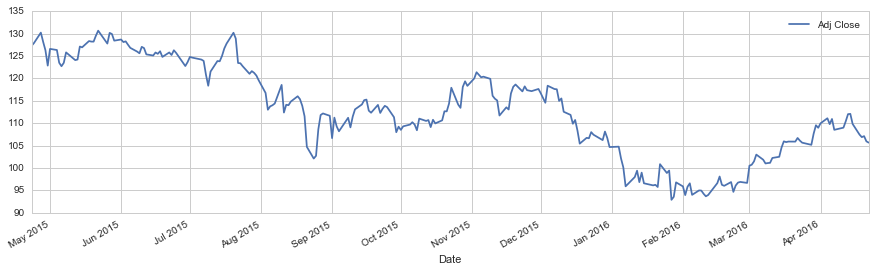

In [21]:
#Get historical view of the adjusted closing prices
AAPL['Adj Close'].plot(legend=True,figsize=(15,4))

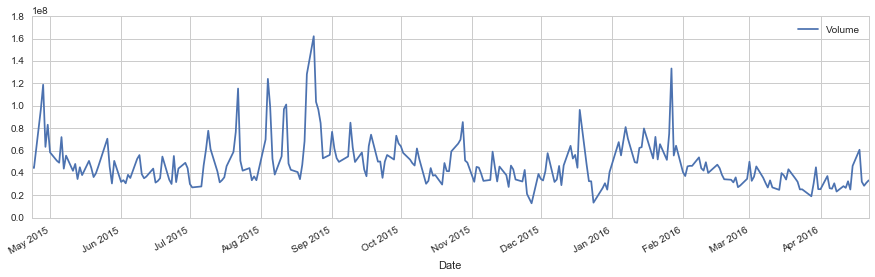

In [22]:
#Plot daily volume of trades
AAPL['Volume'].plot(legend=True,figsize=(15,4))

In [28]:
#Calculate 10-day, 20-day and 50-day moving average (MA)

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

C:\Users\Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


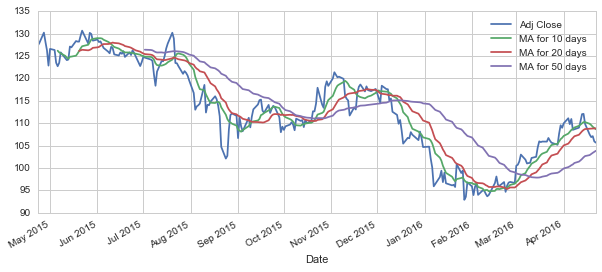

In [29]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize =(10,4))

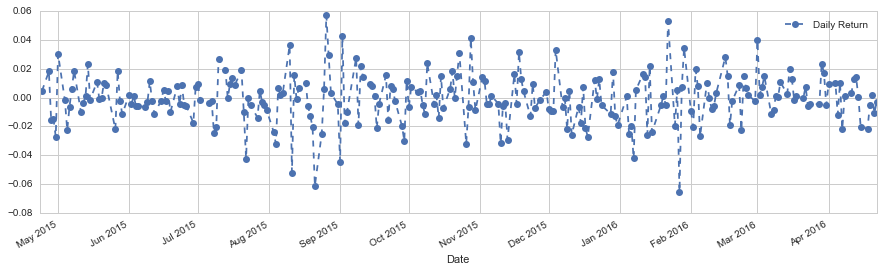

In [35]:
#Chart Daily Returns and the risk of the stock

AAPL['Daily Return']= AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,4), legend=True, linestyle= '--',marker='o')

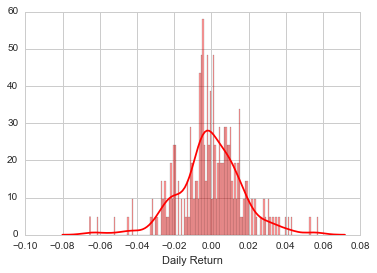

In [41]:
#Use histogram to look at average daily return  (Use dropna to get rid of nulls or fails)

sns.distplot(AAPL['Daily Return'].dropna(),bins=150, color = 'red')

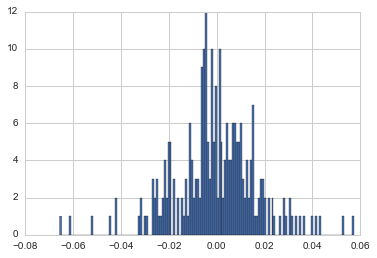

In [40]:
#Take a look at the histogram alone
AAPL['Daily Return'].hist(bins = 150)

In [42]:
#Analyze the returns of all the stocks in the list
#Build a dataframe with only the adjusted close columns

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


In [44]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-23,127.310014,389.989990,547.002472,42.188742
2015-04-24,127.908913,445.100006,565.062561,46.598409
2015-04-27,130.235775,438.559998,555.369995,46.754158
2015-04-28,128.183816,429.309998,553.679993,47.854143
2015-04-29,126.298762,429.369995,549.080017,47.756801


In [45]:
tech_returns = closing_df.pct_change()

In [46]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-23,NaN,NaN,NaN,NaN
2015-04-24,0.004704,0.141311,0.033016,0.104522
2015-04-27,0.018192,-0.014693,-0.017153,0.003342
2015-04-28,-0.015756,-0.021092,-0.003043,0.023527
2015-04-29,-0.014706,0.000140,-0.008308,-0.002034


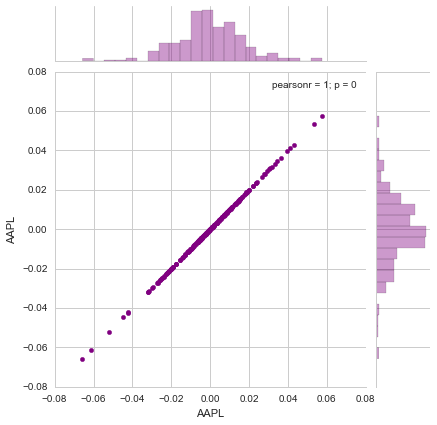

In [47]:
#Compare a single stock to itself - should have a Pearson r value = 1
sns.jointplot('AAPL', 'AAPL', tech_returns, kind = 'scatter', color = 'purple')

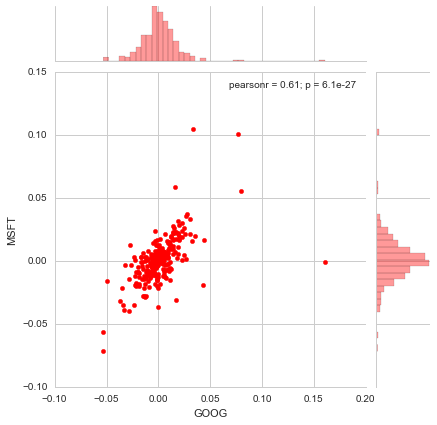

In [48]:
#Now compare two different stocks Compare Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_returns, kind = 'scatter', color = 'red')

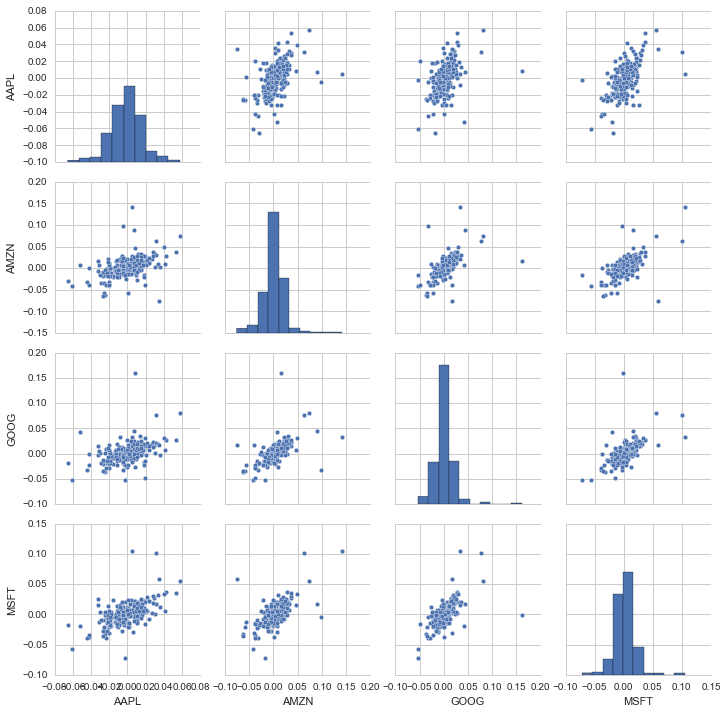

In [49]:
#Do comparison analysis for all four companies using pairplot. Histogram of every stocks daily returns on diagnol
sns.pairplot(tech_returns.dropna())

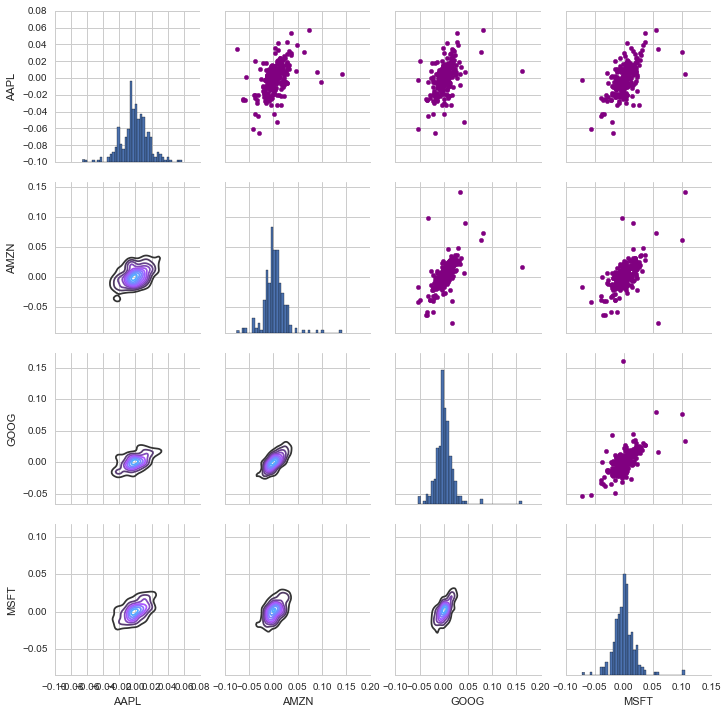

In [50]:
#Setup figure to analyze data correlations further

returns_figure = sns.PairGrid(tech_returns.dropna())

returns_figure.map_upper(plt.scatter,color='purple')    #Scatter plots in the triangle above diaganol

returns_figure.map_lower(sns.kdeplot,cmap='cool_d')     # KDE plots in the triangle below the diaganol

returns_figure.map_diag(plt.hist,bins = 40)             #Histogram on the diaganol

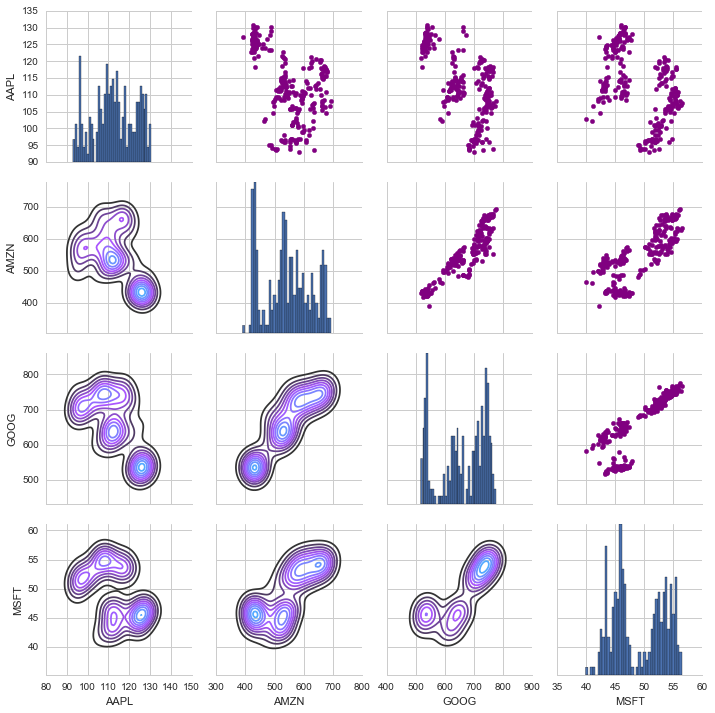

In [51]:
# Do same analysis for the closing prices

returns_figure = sns.PairGrid(closing_df.dropna())

returns_figure.map_upper(plt.scatter,color='purple')    #Scatter plots in the triangle above diaganol

returns_figure.map_lower(sns.kdeplot,cmap='cool_d')     # KDE plots in the triangle below the diaganol

returns_figure.map_diag(plt.hist,bins = 40)             #Histogram on the diaganol

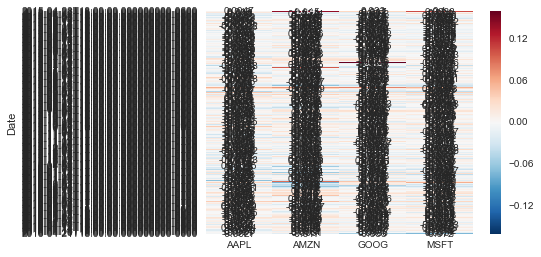

In [53]:
sns.heatmap(tech_returns.dropna(),annot=True)

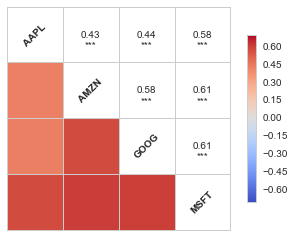

In [54]:
sns.corrplot(tech_returns.dropna(),annot=True)

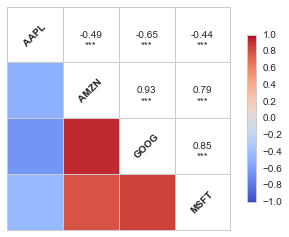

In [55]:
sns.corrplot(closing_df.dropna(),annot=True)  

In [56]:
#Analyze the risk of the stocks

returns = tech_returns.dropna()

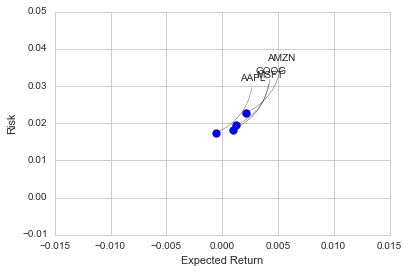

In [57]:
area = np.pi*20    #Define the area for the circles for the scatterplot -- so that they are visible

plt.scatter(returns.mean(),returns.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))